# Case Study Number 2

In [53]:
# Logging Specific Code 
import os 
import sys 
import logging 
from pathlib import Path

# generating logger object 
# FORMAT = "[%(asctime)s]: %(levelname)s: %(module)s :%(message)s" 
FORMAT: str = "[%(asctime)s]: %(message)s"
LOG_DIR: Path = Path("../logs") 
os.makedirs(LOG_DIR, exist_ok=True) 
file_name: str = "case_study_2.logs"
LOG_FILE_PATH: Path = os.path.join(LOG_DIR,file_name) 
logging.basicConfig(
    level=logging.INFO, 
    format=FORMAT ,
    handlers= [
        logging.FileHandler(LOG_FILE_PATH) ,
        logging.StreamHandler(sys.stdout),
    ]
) 

lg : logging.getLogger = logging.getLogger("Case_Study_Logger")

#### Q1. Import the dataset

In [54]:
# imports 
import os 
import pandas as pd 
from pathlib import Path 
from typing import Any


# initiating Data Ingestion 
def initiate_data_ingestion(path: Path) -> tuple[str, pd.DataFrame]:
    """
    This function initiates the data ingestion process.
    Parameters:
        path: Path to the data 
    """
    file_type : str = str() 
    if "https://" in str(path) : 
      file_type: str = "URL"
      df: pd.DataFrame = pd.read_csv(str(path))
      os.makedirs("data", exist_ok=True) 
      df.to_csv(f"data/{str(path).split('/')[-1]}", index=False)
      lg.info(f"Succesfully initiated data ingestion from \"{path}\"")
      lg.info(f"Saved CSV File to: data/{str(path).split('/')[-1]}")
      return file_type, df
    elif ".csv" in str(path) :
      file_type: str = "csv" 
      df: pd.DataFrame = pd.read_csv(path)
      lg.info(f"Succesfully initiated data ingestion from \"{path}\"")
      return file_type, df
    else: 
      raise ValueError("Could not read the source path of Data")

DATA_PATH: Path = "https://raw.githubusercontent.com/anveshdange/DS_Bootcamp/main/data/bank.csv"
p:tuple[str, pd.DataFrame] = initiate_data_ingestion(DATA_PATH)
df: pd.DataFrame; 
_, df = p
df

[2023-06-30 13:37:24,371]: Succesfully initiated data ingestion from "https://raw.githubusercontent.com/anveshdange/DS_Bootcamp/main/data/bank.csv"
[2023-06-30 13:37:24,372]: Saved CSV File to: data/bank.csv


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3,0
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3,0
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3,0
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0,0


Dataset Imported Succesfully

#### Q2. Read the top 5 records from dataset

In [55]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


#### Q3. Read the last 5 records 

In [56]:
frameObject = pd.DataFrame
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3,0
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3,0
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3,0
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0,0
11161,34,9,1,1,0,0,0,0,0,9,5,628,1,-1,0,3,0


#### Q4. Identify the dependent & independent variable in the dataset


In [57]:
# function to get dependent and independent variables 
def get_dep_and_indep(data: frameObject, target: str) -> tuple[frameObject, frameObject] :
    """
    This Function returns the dependent and independent variables frames
    """ 
    target_col: frameObject = pd.DataFrame(data.pop(target), columns=[target])
    lg.info(f"Successfully loaded dependent and independent variables")
    return target_col, data 

# using the function to get dependent and independent variables
independent_df: pd.DataFrame; dependent_df: pd.DataFrame ;
dependent_df, independent_df = get_dep_and_indep(data=df, target="deposit")

[2023-06-30 13:37:24,489]: Successfully loaded dependent and independent variables


In [58]:
lg.info(f"Printing the Dependent Variables") 
dependent_df.head()

[2023-06-30 13:37:24,498]: Printing the Dependent Variables


,deposit
0,1
1,1
2,1
3,1
4,1


In [59]:
lg.info(f"Printing the Independent Variables") 
independent_df.head()

[2023-06-30 13:37:24,513]: Printing the Independent Variables


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3


#### Q5. Display total number of records and attributes present in the dataset

In [60]:
df.shape

(11162, 16)

In [61]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in the Dataset.")

There are 11162 rows and 16 columns in the Dataset.


#### Q6. Display more information about all attributes in the dataset

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        11162 non-null  int64
 1   job        11162 non-null  int64
 2   marital    11162 non-null  int64
 3   education  11162 non-null  int64
 4   default    11162 non-null  int64
 5   balance    11162 non-null  int64
 6   housing    11162 non-null  int64
 7   loan       11162 non-null  int64
 8   contact    11162 non-null  int64
 9   day        11162 non-null  int64
 10  month      11162 non-null  int64
 11  duration   11162 non-null  int64
 12  campaign   11162 non-null  int64
 13  pdays      11162 non-null  int64
 14  previous   11162 non-null  int64
 15  poutcome   11162 non-null  int64
dtypes: int64(16)
memory usage: 1.4 MB


#### Q7. Display statistical information of a dataset

In [63]:
df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,4.487905,1.199337,1.285164,0.015051,1528.538524,0.473123,0.130801,0.489697,15.658036,5.445709,371.993818,2.508421,51.330407,0.832557,2.477782
std,11.913369,3.225132,0.625552,0.749478,0.121761,3225.413326,0.499299,0.337198,0.818724,8.420740,3.191939,347.128386,2.722077,108.758282,2.292007,1.002952
min,18.000000,0.000000,0.000000,0.000000,0.000000,-6847.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,-1.000000,0.000000,0.000000
25%,32.000000,1.000000,1.000000,1.000000,0.000000,122.000000,0.000000,0.000000,0.000000,8.000000,3.000000,138.000000,1.000000,-1.000000,0.000000,2.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,550.000000,0.000000,0.000000,0.000000,15.000000,6.000000,255.000000,2.000000,-1.000000,0.000000,3.000000
75%,49.000000,7.000000,2.000000,2.000000,0.000000,1708.000000,1.000000,0.000000,1.000000,22.000000,8.000000,496.000000,3.000000,20.750000,1.000000,3.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,81204.000000,1.000000,1.000000,2.000000,31.000000,11.000000,3881.000000,63.000000,854.000000,58.000000,3.000000


#### Q8. Get the list of all attributes present in the dataset.

In [64]:
from typing import List  

attr: List[str] = list(df.columns)
print(f"Attributes are :")
i: str; 
for i in attr : print(i) 

Attributes are :
age
job
marital
education
default
balance
housing
loan
contact
day
month
duration
campaign
pdays
previous
poutcome


#### Q9. Check & treat the NULL values in the dataset

In [65]:
# function to check null values 
def get_null_values(data: frameObject) -> pd.core.series.Series :
    """ This Function returns the null values series for each column"""
    ser: pd.core.series.Series = data.isnull().sum() 
    return ser 

# using the function 
null_values = get_null_values(data=df) 
i: str ;
for i in attr:
    lg.info(f"Null Values in {i} are: {null_values[i]}")

[2023-06-30 13:37:24,645]: Null Values in age are: 0
[2023-06-30 13:37:24,647]: Null Values in job are: 0
[2023-06-30 13:37:24,647]: Null Values in marital are: 0
[2023-06-30 13:37:24,648]: Null Values in education are: 0
[2023-06-30 13:37:24,649]: Null Values in default are: 0
[2023-06-30 13:37:24,650]: Null Values in balance are: 0
[2023-06-30 13:37:24,651]: Null Values in housing are: 0
[2023-06-30 13:37:24,652]: Null Values in loan are: 0
[2023-06-30 13:37:24,652]: Null Values in contact are: 0
[2023-06-30 13:37:24,653]: Null Values in day are: 0
[2023-06-30 13:37:24,654]: Null Values in month are: 0
[2023-06-30 13:37:24,655]: Null Values in duration are: 0
[2023-06-30 13:37:24,656]: Null Values in campaign are: 0
[2023-06-30 13:37:24,657]: Null Values in pdays are: 0
[2023-06-30 13:37:24,659]: Null Values in previous are: 0
[2023-06-30 13:37:24,660]: Null Values in poutcome are: 0


We can see that there are no NULL values in the data. Hence, we need not to do anything to the data.

#### Q10. Check & treat for Duplicate record present in the dataset

In [66]:
dub: frameObject = df[df.duplicated()]
dub

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome


There are no duplicate row values in the dataset

#### Q11.Check & treat outliers in dataset.

[2023-06-30 13:37:24,840]: Box Plot created for Outlier Detection
[2023-06-30 13:37:25,145]: BoxPlot saved at: boxplot.png
[2023-06-30 13:37:25,146]: Detecting Outliers in the Dataset
--------------------------------------------------------
[2023-06-30 13:37:25,151]: Count of Outliers in "age" is: 171
[2023-06-30 13:37:25,157]: Count of Outliers in "job" is: 0
[2023-06-30 13:37:25,162]: Count of Outliers in "marital" is: 0
[2023-06-30 13:37:25,167]: Count of Outliers in "education" is: 0
[2023-06-30 13:37:25,171]: Count of Outliers in "default" is: 168
[2023-06-30 13:37:25,178]: Count of Outliers in "balance" is: 1055
[2023-06-30 13:37:25,183]: Count of Outliers in "housing" is: 0
[2023-06-30 13:37:25,188]: Count of Outliers in "loan" is: 1460
[2023-06-30 13:37:25,193]: Count of Outliers in "contact" is: 0
[2023-06-30 13:37:25,198]: Count of Outliers in "day" is: 0
[2023-06-30 13:37:25,203]: Count of Outliers in "month" is: 0
[2023-06-30 13:37:25,210]: Count of Outliers in "duration" i

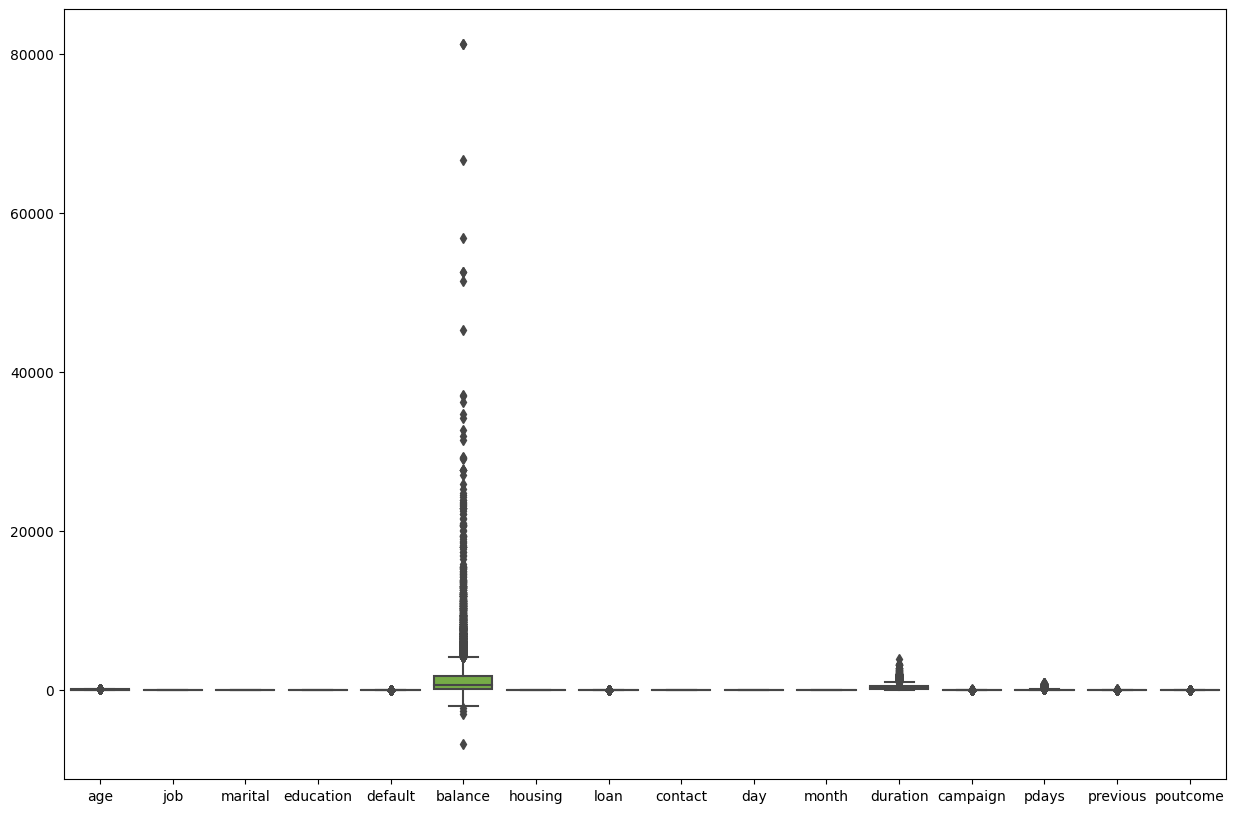

In [67]:
# Imports 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 
import sys
import pandas as pd 
import numpy as np 

from typing import List 
from pathlib import Path 

# Helper Function 
def sep() -> str: return "--------------------------------------------------------"

# function to hanfle outliers 
def handle_outliers(data: pd.DataFrame, verbose:bool=False) -> pd.DataFrame : 
    """ This Function Detects & Handles all the Outliers """
    cols: List[str] = list(data.columns)
    outliers_text_file: List[str] = list()
    plt.figure(figsize=(15, 10)) 
    sns.boxplot(data=df[cols])
    lg.info(f"Box Plot created for Outlier Detection")
    BOX_PLOT_PATH: Path = Path("boxplot.png")
    plt.savefig(BOX_PLOT_PATH)
    lg.info(f"BoxPlot saved at: {BOX_PLOT_PATH}")

    # IQR Outlier Detection for counting the number of outliers 
    i: str; lg.info(f"Detecting Outliers in the Dataset")
    print(sep())
    for i in cols : 
        outliers: List[Any] = list() 
        sorted_col: pd.DataFrame = sorted(data[i])
        q1: np.float64 = np.percentile(sorted_col, 25) 
        q3: np.float64 = np.percentile(sorted_col, 75) 

        if verbose: print(f"Q3: {q3}, Q1: {q1}") 

        __IQR: np.float64 = q3 - q1 
        lower_bound: np.float64 = q1 - (1.5* __IQR) 
        upper_bound: np.float64 = q3 + (1.5* __IQR)

        j: Any; k:Any; 
        for j in sorted_col :
            if(j>upper_bound or j<lower_bound): outliers.append(j) 
        outliers: List[float] = [float(l) for l in outliers] 
        lg.info(f"Count of Outliers in \"{i}\" is: {len(outliers)}")
        outliers_text_file.append(f"Count of Outliers in \"{i}\" is: {len(outliers)}\n")
    
    # saving output in a outliers_counts file 
    COUNT_FILE: str = "outliers_counts.txt"
    with open(COUNT_FILE, "w") as outliers_counts:
        outliers_counts.writelines(outliers_text_file)
    print(sep())
    lg.info(f"Saved Outliers Counts of each column to : {COUNT_FILE}")

    # Handling outliers using the Florring and Capping
    lg.info(f"Handling outliers using the Floor and Cap Method")
    q: str;
    for q in list(data.columns): 
        col: frameObject = data[q]
        ten_per: np.float64 = np.percentile(col, 40) 
        ninety_per: np.float64 = np.percentile(col, 60)
        pipeline_1: np.ndarray = np.where(col<ten_per,ten_per, col) 
        pipeline_2: np.ndarray = np.where(pipeline_1>ninety_per,ninety_per, pipeline_1)
        data[q] = pipeline_2
    lg.info("Outliers removed Successfully")
    return data

# calling the function 
df = handle_outliers(df)


Now, after the Florring and Capping function call let's see if we still have some Outliers left in the data 

In [68]:
# Custom Function to count & print outliers in each of our columns
def iqr_outliers(col: pd.DataFrame, verbose: bool = False) -> List[float] :
    outliers: List[Any] = list() 
    sorted_col : pd.DataFrame = sorted(col) 
    q1: np.float64 = np.percentile(sorted_col,25) 
    q3: np.float64 = np.percentile(sorted_col,75)

    if verbose:  print(f"Q1: {q1}, Q3: {q3}") 

    __IQR : np.float64 = q3 - q1 
    lower_bound: np.float64 = q1 - (1.5* __IQR) 
    upper_bound: np.float64 = q3 + (1.5* __IQR)

    i: Any 
    for i in sorted_col : 
        if(i> upper_bound or i<lower_bound) : outliers.append(i)
    outliers = [float(i) for i in outliers]
    return outliers

i: str
for i in list(df.columns) :
    outliers: List[float] = iqr_outliers(col=df[i], verbose=False)
    print(f"Outliers in {i} atttibute are: {len(outliers)}")

Outliers in age atttibute are: 0
Outliers in job atttibute are: 0
Outliers in marital atttibute are: 0
Outliers in education atttibute are: 0
Outliers in default atttibute are: 0
Outliers in balance atttibute are: 0
Outliers in housing atttibute are: 0
Outliers in loan atttibute are: 0
Outliers in contact atttibute are: 0
Outliers in day atttibute are: 0
Outliers in month atttibute are: 0
Outliers in duration atttibute are: 0
Outliers in campaign atttibute are: 0
Outliers in pdays atttibute are: 0
Outliers in previous atttibute are: 0
Outliers in poutcome atttibute are: 0


We can see that there are no Outliers left in the Data.

#### Q12. Generate the count plot for dependent variable in the dataset.

[2023-06-30 13:37:25,533]: Succesfully created folder for count plots at: count_plots
[2023-06-30 13:37:25,537]: Generating Count Plot for : "deposit" column
[2023-06-30 13:37:25,565]: Saving Count Plot : count_plots/deposit_count.png
[2023-06-30 13:37:25,635]: Count plot saved at: "count_plots/deposit_count.png"


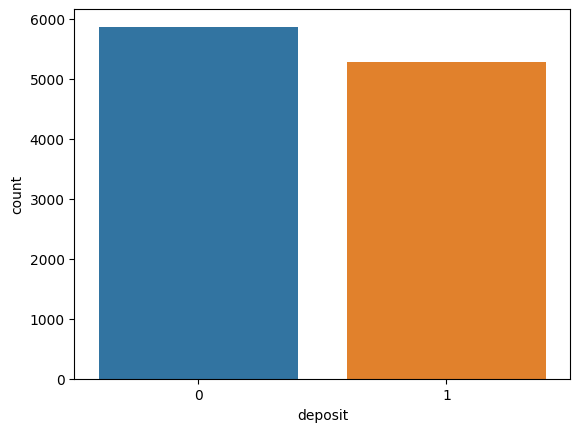

In [69]:
import os 
import sys 
import matplotlib.pyplot as plt 
import seaborn as sns 

from pathlib import Path

# function to generate count plot 
def generateCountPlot(data:frameObject) -> Path : 
    FOLDER_PATH: Path = Path("count_plots")
    os.makedirs(FOLDER_PATH, exist_ok=True) 
    lg.info(f"Succesfully created folder for count plots at: {FOLDER_PATH}")
    i: str ;
    dependent_cols: List[str] = list(data.columns) 
    for i in dependent_cols : 
        if data.nunique()[i] != 1 :
            logging.info(f"Generating Count Plot for : \"{i}\" column")
            sns.countplot(data=data, x=data[i]) 
            image_save_path: Path = os.path.join(FOLDER_PATH,f"{i}_count.png") 
            logging.info(f"Saving Count Plot : {str(image_save_path)}")
            plt.savefig(image_save_path)
            logging.info(f"Count plot saved at: \"{image_save_path}\"")
        else: 
            logging.info(f"There are no Unique value for column : \"{i}\"")
            logging.info(f"Not generating Count Plot for column: \"{i}\"")
    return None 

# calling the generatecountplot function 
folder_path = generateCountPlot(data=dependent_df)

#### Q13. Generate the histplot for all attributes present in the dataset

In [70]:
p:tuple[str, pd.DataFrame] = initiate_data_ingestion(DATA_PATH)
df: pd.DataFrame; 
_, df = p
df

[2023-06-30 13:37:25,927]: Succesfully initiated data ingestion from "https://raw.githubusercontent.com/anveshdange/DS_Bootcamp/main/data/bank.csv"
[2023-06-30 13:37:25,928]: Saved CSV File to: data/bank.csv


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3,0
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3,0
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3,0
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0,0


[2023-06-30 13:37:25,949]: Created Folder for Histplots at: histplots


[2023-06-30 13:37:26,147]: Saved Histplot for "age" column at: histplots/age_histplot.png
[2023-06-30 13:37:26,282]: Saved Histplot for "job" column at: histplots/job_histplot.png
[2023-06-30 13:37:26,424]: Saved Histplot for "marital" column at: histplots/marital_histplot.png
[2023-06-30 13:37:26,585]: Saved Histplot for "education" column at: histplots/education_histplot.png
[2023-06-30 13:37:26,739]: Saved Histplot for "default" column at: histplots/default_histplot.png
[2023-06-30 13:37:27,508]: Saved Histplot for "balance" column at: histplots/balance_histplot.png
[2023-06-30 13:37:27,846]: Saved Histplot for "housing" column at: histplots/housing_histplot.png
[2023-06-30 13:37:28,161]: Saved Histplot for "loan" column at: histplots/loan_histplot.png
[2023-06-30 13:37:28,515]: Saved Histplot for "contact" column at: histplots/contact_histplot.png
[2023-06-30 13:37:28,893]: Saved Histplot for "day" column at: histplots/day_histplot.png
[2023-06-30 13:37:29,229]: Saved Histplot for 

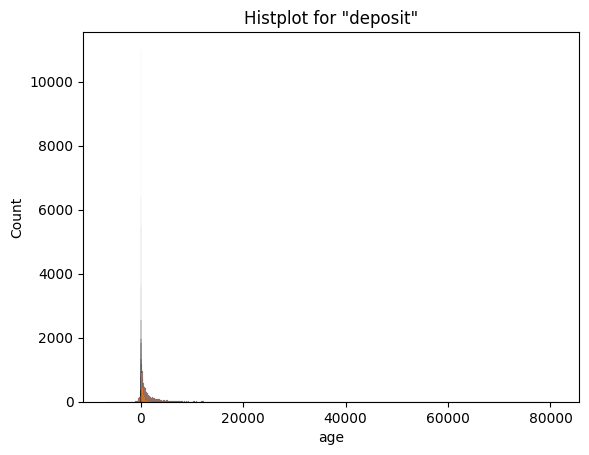

In [71]:
import os 
import matplotlib.pyplot as plt 
import seaborn as sns 

from pathlib import Path 

# function to generate histplot for all attributes in the dataframe 
def generate_histplots(data:pd.DataFrame) -> Path: 
    """ This Function generates Histplot for all attributes in the dataframe"""
    FOLDER_PATH: Path = Path('histplots')
    os.makedirs(FOLDER_PATH, exist_ok=True) 
    lg.info(f"Created Folder for Histplots at: {FOLDER_PATH}")
    i:str; 
    for i in list(data.columns) : 
        sns.histplot(df[i])
        plt.title(f"Histplot for \"{i}\"")
        fig_path: Path = os.path.join(FOLDER_PATH,f"{i}_histplot.png")
        plt.savefig(fig_path)
        lg.info(f"Saved Histplot for \"{i}\" column at: {fig_path}")
    return FOLDER_PATH 

# using the above function to generate histplots 
FILE_PATH_HIST:Path = generate_histplots(data=df)


We have succesfully generated HistPlots for out data

#### Q14. Generate the heatmap and convey important independent variable affecting diabetes.

[2023-06-30 13:37:35,743]: Heatmap for Data Saved at : "heatplot.jpg"


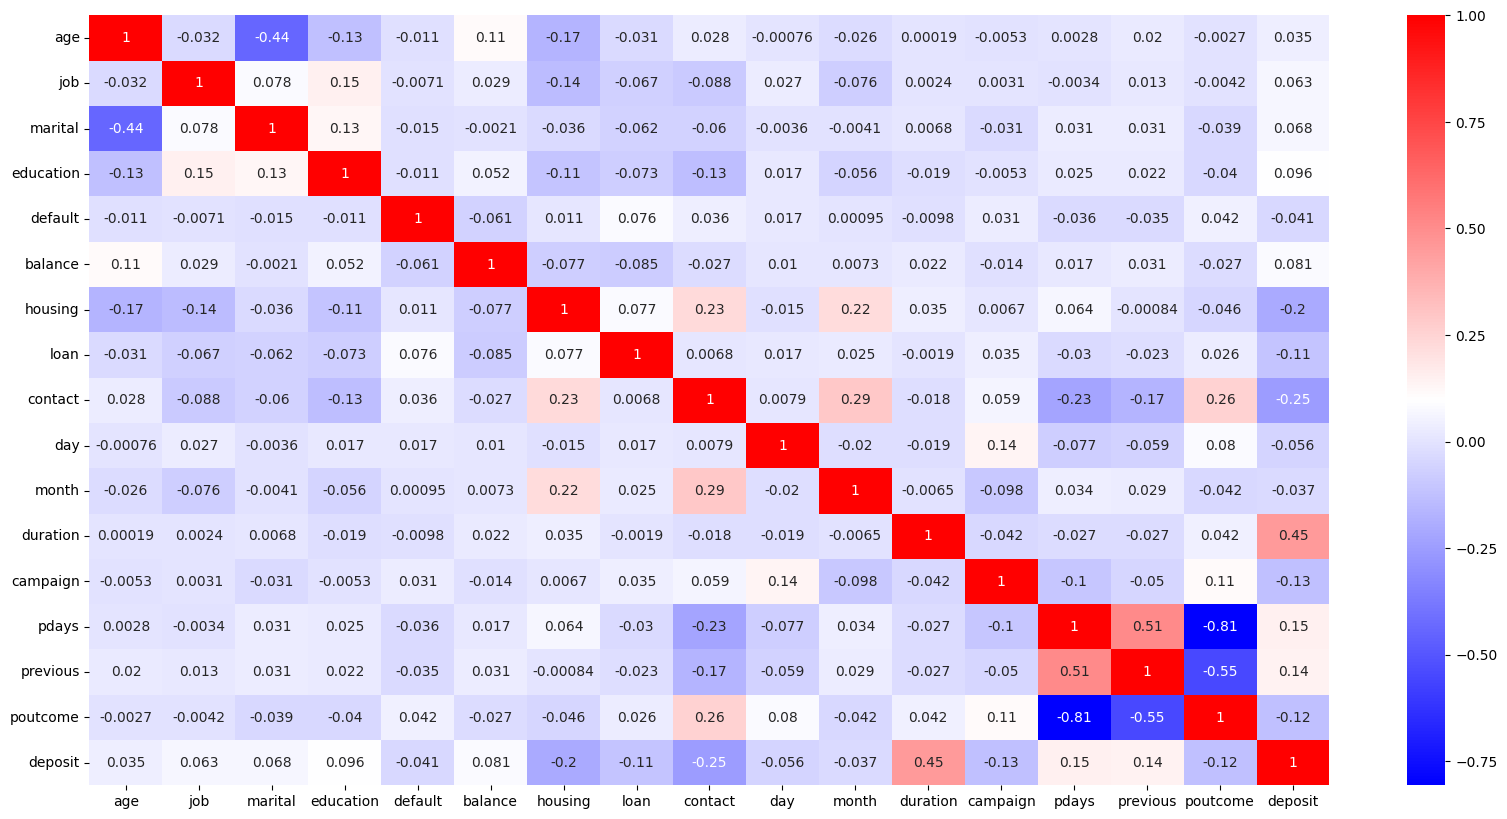

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns 

from pathlib import Path

# generating heatplot 
def generateHeatplot(data:frameObject) -> Path :
    FILE: Path = Path("heatplot.jpg") 
    plt.figure(figsize=(20,10))
    sns.heatmap(data.corr(), annot=True, cmap="bwr") 
    plt.savefig(FILE)
    lg.info(f"Heatmap for Data Saved at : \"{FILE}\"")
    return FILE 

# using heatplot function 
file_path: Path = generateHeatplot(data=df)

We can infer that duration is highly corelated to deposit & contact is the Least Corelated

#### Q15. Generate the pairplot to check whether dataset is linearly or non linearly seperable 

In [73]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


[2023-06-30 13:37:48,133]: Created PairPlot for :['age', 'job', 'balance', 'duration', 'deposit']
[2023-06-30 13:37:48,133]: PairPlot saved at : pairplot.png


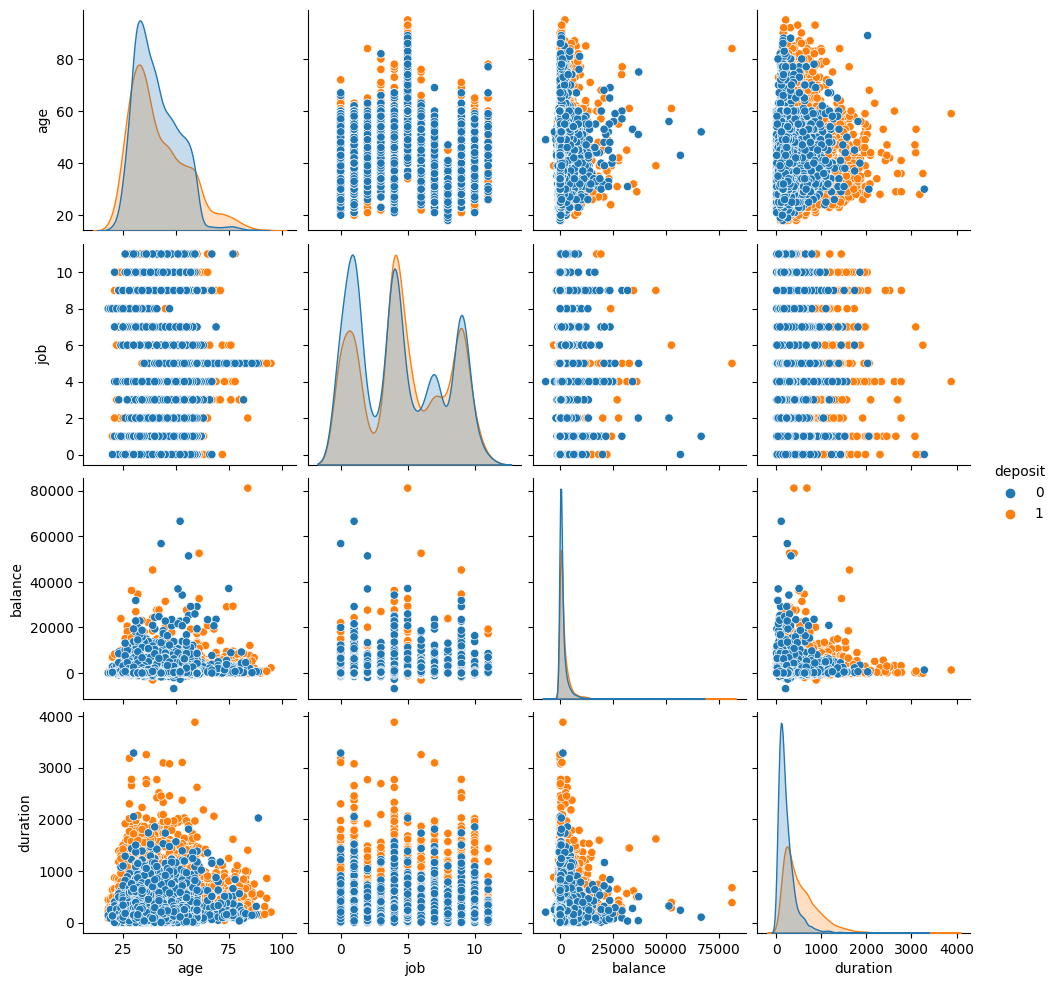

In [74]:
import seaborn as sns 
import matplotlib.pyplot as plt

from pathlib import Path 

# function 
def generatePairPlot(data:Path, target: str) -> Path : 
    """ This Function Generated pair plot of the dataset""" 
    PAIRPLOT_PATH: Path = Path('pairplot.png')
    sns.pairplot(data, hue=target)
    plt.savefig(PAIRPLOT_PATH)
    lg.info(f"Created PairPlot for :{list(data.columns)}")
    lg.info(f"PairPlot saved at : {PAIRPLOT_PATH}")
    return PAIRPLOT_PATH 

non_cat:List[str]=["age", "job", "balance", "duration", "deposit"]
path_heatmap: Path = generatePairPlot(data=df[non_cat], target="deposit")

We can see that the data is not Linearly Seperable

#### Q16. Apply feature scaling to scale the data in range.

In [75]:
import sklearn as sc
import numpy as np
from typing import List
from sklearn.preprocessing import MinMaxScaler

def apply_feature_scaling(data: pd.DataFrame, features:List[str]) -> Any :
    """ This Function Applies Feature Scaling to a DataFrame """
    scaler: sc.preprocessing.MinMaxScaler = MinMaxScaler()
    transforming_df: frameObject = data[features] 
    cols: List[str] = list(transforming_df.columns)
    scaler: sc.preprocessing.MinMaxScaler = MinMaxScaler() 
    lg.info(f"Applying feature scaling to column: {features}")
    scaled_df_array: np.ndarray = scaler.fit_transform(transforming_df) 
    scaled_df: frameObject = pd.DataFrame(scaled_df_array, columns=cols)
    i:str;
    for i in list(scaled_df.columns) : data[i] = scaled_df[i] 
    del scaled_df ; 
    lg.info("Feature Scaling Succesfull")
    return data

df = apply_feature_scaling(data=df, features=non_cat)


[2023-06-30 13:37:51,546]: Applying feature scaling to column: ['age', 'job', 'balance', 'duration', 'deposit']
[2023-06-30 13:37:51,557]: Feature Scaling Succesfull


In [76]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,0.532468,0.000000,1,1,0,0.104371,1,0,2,5,8,0.268110,1,-1,0,3,1.0
1,0.493506,0.000000,1,1,0,0.078273,0,0,2,5,8,0.377675,1,-1,0,3,1.0
2,0.298701,0.818182,1,1,0,0.092185,1,0,2,5,8,0.357566,1,-1,0,3,1.0
3,0.480519,0.636364,1,1,0,0.105882,1,0,2,5,8,0.148750,1,-1,0,3,1.0
4,0.467532,0.000000,1,2,0,0.079851,0,0,2,5,8,0.172983,2,-1,0,3,1.0


Feature Scaling has been done Successfully.

#### Q17. Divide the dataset into dependent and Independent variables
#### AND 
#### Q18. Split the dataset into train & test set with ratio of 80:20

In [77]:
from sklearn.model_selection import train_test_split

TTS = tuple[frameObject, frameObject, frameObject, frameObject]
def dep_indep_vars(data:frameObject) -> TTS :
    target: str = 'deposit'
    X: pd.DataFrame = df[[i for i in list(data.columns) if i != target]]
    y: pd.DataFrame = df[target]
    X_train:frameObject; X_test:frameObject; y_train:frameObject; y_test:frameObject;
    lg.info("Created X_train, y_train, X_test, y_test dataframes with 80:20 ratio")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    return X_train, X_test, y_train, y_test

# calling the function 
X_train:frameObject; X_test:frameObject; y_train:frameObject; y_test:frameObject
X_train, X_test, y_train, y_test = dep_indep_vars(data=df)


[2023-06-30 13:37:51,676]: Created X_train, y_train, X_test, y_test dataframes with 80:20 ratio


In [78]:
X_train.shape, y_train.shape, X_test.shape ,y_test.shape

((8929, 16), (8929,), (2233, 16), (2233,))

#### Q19. Save all the charts generated during this case study 
#### AND 
#### Q20. Provide your observation for every chart. 

Already did them under the charts in the jupyter notebook.